In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/raw/Training.csv')
df = df.drop('Unnamed: 133', axis=1)


--- Top 20 Most Common Symptoms Across All Diseases ---
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
skin_rash             786
malaise               702
chest_pain            696
joint_pain            684
itching               678
sweating              678
dark_urine            570
cough                 564
diarrhoea             564
muscle_pain           474
dtype: int64


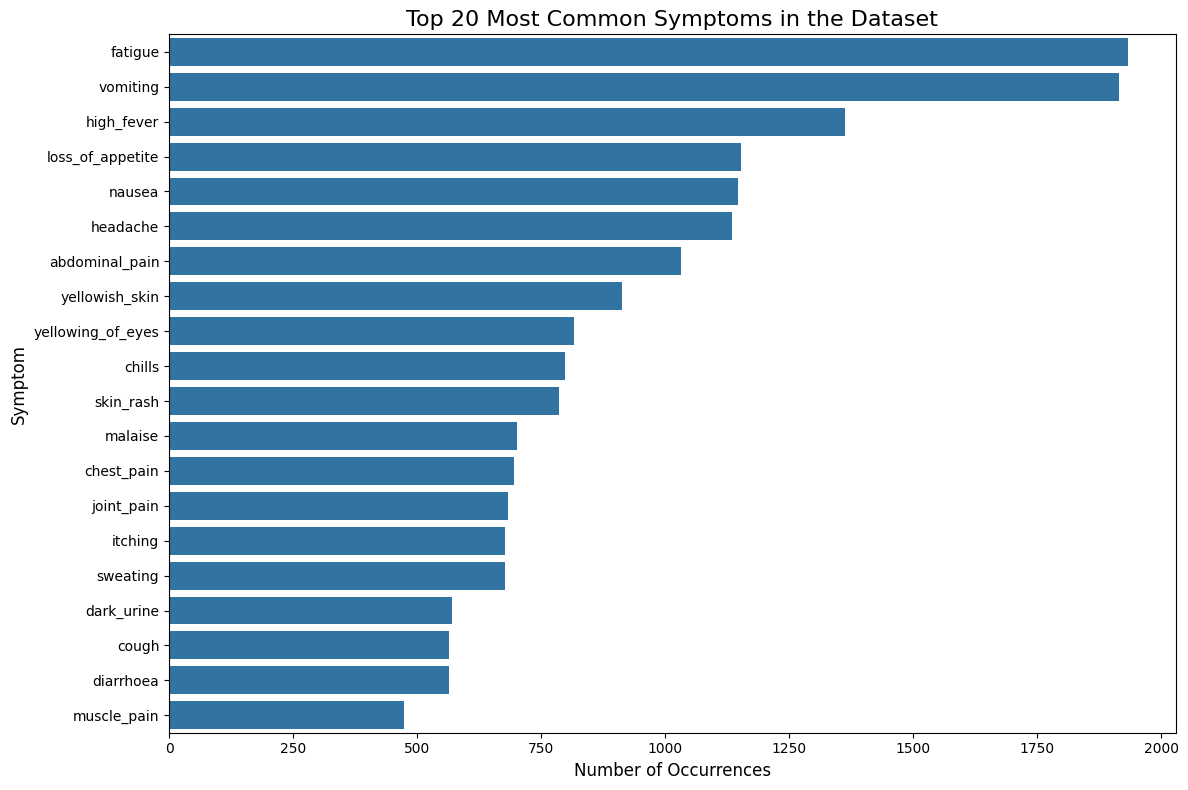

In [4]:
# --- Analyze Overall Symptom Frequency ---
# Let's find out which symptoms are most common across all diseases.
# We sum up the occurrences of each symptom (since they are binary 1s and 0s)

symptom_counts = df.drop('prognosis', axis=1).sum().sort_values(ascending=False)

print("\n--- Top 20 Most Common Symptoms Across All Diseases ---")
print(symptom_counts.head(20))

# Visualize the top 20 symptoms
plt.figure(figsize=(12, 8))
sns.barplot(x=symptom_counts.head(20).values, y=symptom_counts.head(20).index)
plt.title('Top 20 Most Common Symptoms in the Dataset', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.tight_layout()
plt.show()

Symptoms associated with Jaundice in the dataset:
itching           114
weight_loss       114
fatigue           114
vomiting          114
dark_urine        114
yellowish_skin    114
abdominal_pain    114
high_fever        114
dtype: int64


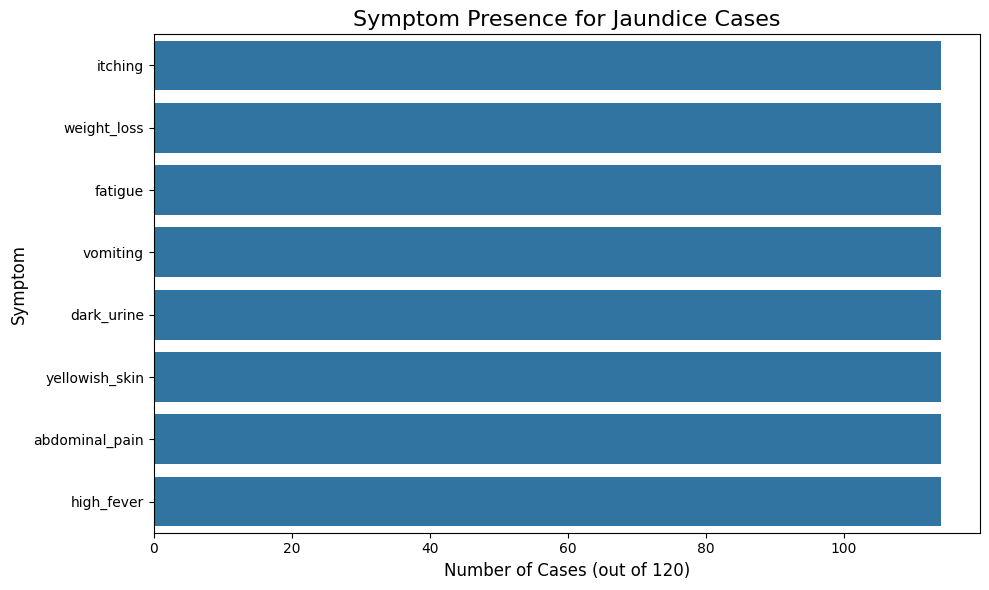

In [5]:
# --- Analyze Symptoms for a Specific Disease ---
# This helps us understand the unique "symptom signature" of a disease.
# Let's pick 'Jaundice' as an example.

# Filter the dataframe to only include rows where the prognosis is Jaundice
jaundice_df = df[df['prognosis'] == 'Jaundice']

# Sum the symptoms for this subset. Since all 120 rows are for Jaundice,
# a sum of 120 means the symptom is present in every case of Jaundice in this dataset.
jaundice_symptoms = jaundice_df.drop('prognosis', axis=1).sum().sort_values(ascending=False)

# Filter out symptoms that never appear for Jaundice (count is 0)
jaundice_symptoms = jaundice_symptoms[jaundice_symptoms > 0]

print("Symptoms associated with Jaundice in the dataset:")
print(jaundice_symptoms)

# Visualize the symptoms for Jaundice
plt.figure(figsize=(10, 6))
sns.barplot(x=jaundice_symptoms.values, y=jaundice_symptoms.index)
plt.title('Symptom Presence for Jaundice Cases', fontsize=16)
plt.xlabel('Number of Cases (out of 120)', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.tight_layout()
plt.show()

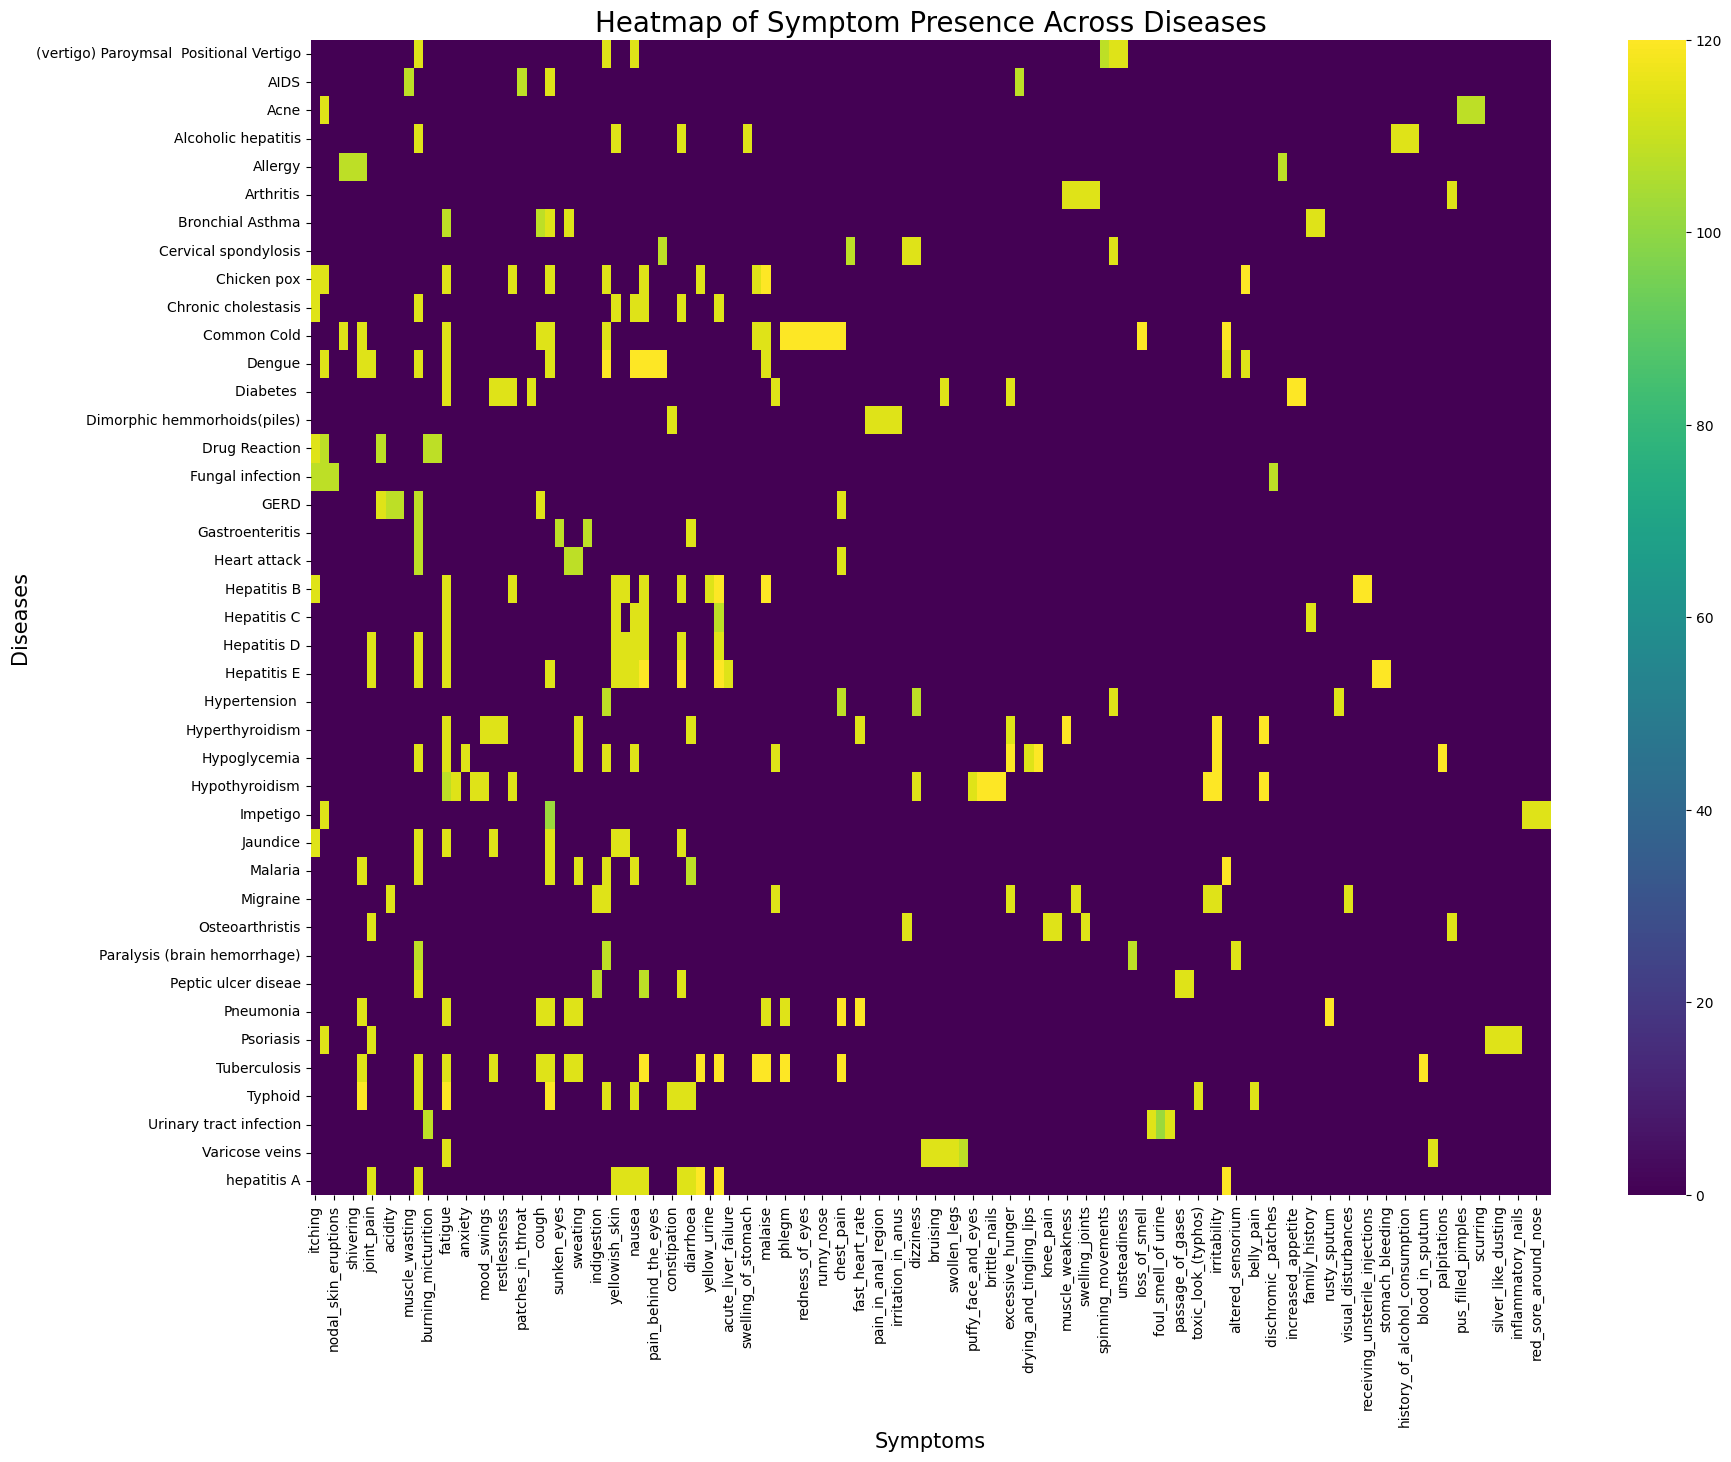

In [6]:
# --- Create a Symptom-Disease Heatmap (Advanced) ---
# This shows the correlation between every symptom and every disease.
# It can be very insightful but also very large.

# Group by disease and sum the occurrences of each symptom
disease_symptom_corr = df.groupby('prognosis').sum()

# Create the heatmap
plt.figure(figsize=(20, 15)) 
sns.heatmap(disease_symptom_corr, cmap='viridis')
plt.title('Heatmap of Symptom Presence Across Diseases', fontsize=20)
plt.xlabel('Symptoms', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()





#### Symptom-Disease Correlation Heatmap. 

This visualization shows the presence of each symptom (x-axis) for each disease (y-axis). The bright yellow squares indicate a strong positive correlation, meaning the symptom is almost always present for that disease. The distinct horizontal patterns confirm that many diseases have unique "symptom signatures," providing a strong basis for an accurate predictive model.


#### The Story It Tells

+ **Find the "Jaundice" Row:** Look at the row for Jaundice. You'll see a distinct pattern of bright yellow squares. These correspond to the exact symptoms we found in our specific analysis (yellowish_skin, vomiting, fatigue, etc.). The heatmap just shows us this for all diseases at once.

+ **Look for Other Bright Lines:** Scan down the chart. You can see other diseases like Hepatitis A, B, C, D, and E also have very clear, bright horizontal lines. This tells us they also have strong "symptom signatures."

+ **The Main Takeaway:**The most important story here is that **the patterns are clear and not random.** The dataset isn't a chaotic mess. It has strong, identifiable relationships between symptom combinations and specific diseases. This is the best possible news for our machine learning model. It tells us that the model has a very high chance of learning these patterns and being extremely accurate.

### Summary of Insights from Exploratory Data Analysis

Our deep dive into the dataset has revealed several key characteristics that are crucial for our modeling strategy:

1. **Perfectly Balanced Dataset:** The most significant finding is that the dataset is perfectly balanced, with each of the 41 diseases represented by exactly 120 samples. This is a major advantage as it eliminates the need for complex techniques to handle class imbalance and ensures that accuracy will be a reliable performance metric.

2. **Presence of Strong "Symptom Signatures":** The analysis of individual diseases, like Jaundice, and the overall symptom-disease heatmap clearly show that many diseases have a unique combination of highly correlated symptoms. These "signatures," visible as bright horizontal lines on the heatmap, are strong, learnable patterns that provide a solid foundation for a high-accuracy predictive model.

3. **Existence of General vs. Specific Symptoms:** Our frequency analysis showed that while some symptoms like fatigue and vomiting are very common across many diseases, other symptoms are much more specific. The model's success will depend on its ability to learn the unique combinations of these general and specific symptoms to make a correct diagnosis.

4. **High Degree of Sparsity:** The heatmap is predominantly dark, indicating that for any given disease, the vast majority of symptoms are absent. This sparsity is beneficial as it allows the model to focus only on the few, most important symptoms for each disease, simplifying the learning process.

**Conclusion from EDA:** The dataset is clean, well-structured, and contains distinct, learnable patterns. These characteristics make it an excellent candidate for building a robust and highly accurate classification model. We can proceed to the modeling phase with high confidence.